# MICROSOFT MOVIE STUDIO ANALYSIS

## Business Understanding

Microsoft is looking into starting a new movie studio and since they do not have any experience with movie studios, this project is aimed at analysing which films are currently doing the best at the box office to come up with recommendations for Microsoft as it starts its first movie studio.

## Data Source and Exploration

This data comes from various data files : [bom.movie_gross.csv.gz](dsc-phase-1-project-v2-4/zippedData/bom.movie_gross.csv.gz) and [tmdb.csv](dsc-phase-1-project-v2-4/zippedData/tmdb.movies.csv.gz) as well as [im.db](dsc-phase-1-project-v2-4/zippedData/im.db.zip)
In order to carry out the data analysis, the first step is choosing the data we want to work with depending on the information we want to analyse. In this case what we need includes
- Film release dates
- genre
- budget
- movie ratings
- box office gross(domestic and international)

In [50]:
# import of my modules
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline

The next step will be to explore the data sets that we have, we will read from the file bom.movie_gross.csv.gv and check out the dataFrame that we are working with, our DataFrame will be df

In [51]:
df = pd.read_csv('bom.movie_gross.csv')

df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


### Data Cleaning


- The next step is to clean the data to ensure it does not have missing values and drop any if need be.
In this case we will check how the data looks using df.info() then in case of missing values, we will do data cleaning

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


From the above result, the columns do not all have 3387 entries, which shows we have some missing data,let's check the number of entries in our columns with missing data

In [53]:
# Check for missing values in all columns
print(df.isnull().sum())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


The foreign_gross column has a significant number of missing values, let's check to understand the inconsistencies that this may come with

In [5]:
# Explore the 'foreign_gross' column specifically
print(df['foreign_gross'].unique())  # View unique values to understand inconsistencies
len(df['foreign_gross'].unique())  # Number of unique values 

['652000000' '691300000' '664300000' ... '530000' '256000' '30000']


1205

From the above code, we have 1205 entries to work with, this is an okay number to use as a sample for investigation and analysis, we can therefore go ahead and fill in the missing values in order to conduct analysis on the data

In [54]:
# filling in the missing values with 0
df['foreign_gross'] = df['foreign_gross'].fillna(0)
df['foreign_gross'].isnull().sum()

0

In [55]:
# Check whether the column has been filled correctly 
print(df['foreign_gross']) #excpected entries are 3387

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382            0
3383            0
3384            0
3385            0
3386            0
Name: foreign_gross, Length: 3387, dtype: object


In order to conduct any operations on the data, let us check whether it is a float or an integer since we want to do some arithmetic operations.
Let's work on the foreign_gross column statistics


In [56]:
print(df['foreign_gross'].dtype)

object


The code above means the data has some text and therefore we still need to clean by removing the objects

In [57]:
df.dropna(subset=['foreign_gross'], inplace=True)
print(df['foreign_gross'].dtype)

object


In [58]:
import numpy as np
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'],errors='coerce')
print(df['foreign_gross'].dtype)


float64


As seen above, we have successfully drpped any entry that had text and we can now perform our operations.

In [60]:
#finding the mean and median of foreign_gross
mean_foreign_gross_earning = df['foreign_gross'].mean()
median_foreign_gross_earning = df['foreign_gross'].median()
print(f'mean_foreign_gross_earning: {mean_foreign_gross_earning}')
print(f'median_foreign_gross_earning: {median_foreign_gross_earning}')

mean_foreign_gross_earning: 45096365.63660556
median_foreign_gross_earning: 1500000.0


Above , we have seen that the average foreign gross is 45 Million, let us do the same for domestic gross in order to see where we get more earnings.

The next step is to focus on the domestic_gross since it has few missing values: we will drop the missing values 

- We will work with domestic_gross and see if it is doing better than foreign_gross
- We will drop the missing values NaN 

In [61]:
#Dropping the missing values in the domestic_gross column 
df.dropna(subset=['domestic_gross'], inplace=True) #inplace = True to maintain the initial dataFrame
#check the if all missing values have been dropped
df['domestic_gross'].isnull().sum() 

0

Since we have dropped all the missing values, we can go ahead and perform arithmetic operations on the domestic gross column

In [62]:
#mean of the domestic_gross
mean_domestic_gross_earning = df['domestic_gross'].mean()
print(f'mean_domestic_gross_earning: {mean_domestic_gross_earning}')
#median of the domestic_gross
median_domestic_gross_earning = df['domestic_gross'].median()
print(f'median_domestic_gross_earning: {median_domestic_gross_earning}')

mean_domestic_gross_earning: 28745845.06698422
median_domestic_gross_earning: 1400000.0


As seen above, the average domestic gross earnings are 28.7 Million, we can therefore conclude that foreign gross earnings are higher.

### 1st deduction from this data: What is made from foreign gross is higher that what is made from domestic gross, therefore some conclusions that can be made is to:

- Focus on International Appeal:Consider stories and themes that can resonate with a global audience, transcending cultural barriers.This could involve universal themes like love, family, adventure, or stories with minimal dialogue.

- Co-productions: Partner with international production companies to leverage their expertise in foreign markets and potentially gain access to financing and distribution channels i.e we can check another data set to see which studio is doing well and how is their foreign gross in order to consider partnerships.

- Domestic Market Value: Don't neglect the domestic market entirely. A strong domestic performance can still be valuable and contribute to a film's overall success.

# Exploratory Data Analysis

### Descriptive Statistics

In this section, we analyse the mean, median and other measures of central tendencies
- We will calculate the mean and median to find out the average gross earned from the movies

In [63]:
#mean of the domestic_gross
print(f'mean_domestic_gross_earning: {mean_domestic_gross_earning}')
#median of the domestic_gross
print(f'median_domestic_gross_earning: {median_domestic_gross_earning}')

mean_domestic_gross_earning: 28745845.06698422
median_domestic_gross_earning: 1400000.0


In [64]:
#finding the mean and median of foreign_gross
print(f'mean_foreign_gross_earning: {mean_foreign_gross_earning}')
print(f'median_foreign_gross_earning: {median_foreign_gross_earning}')

mean_foreign_gross_earning: 45096365.63660556
median_foreign_gross_earning: 1500000.0


##### This shows the average of foreign gross earnings is 45 million while that of domestic gross earning from a movie is 28.7 million, let us put the individual earnings of the top earning movies to have a picture of the movies that are doing well so as to understand which structure in terns of theme etc. , will give better results.



#### -We will start with visualization of the domestic gross to see which movie had the highest domestic gross earning

- Visualization of the data on a graph 

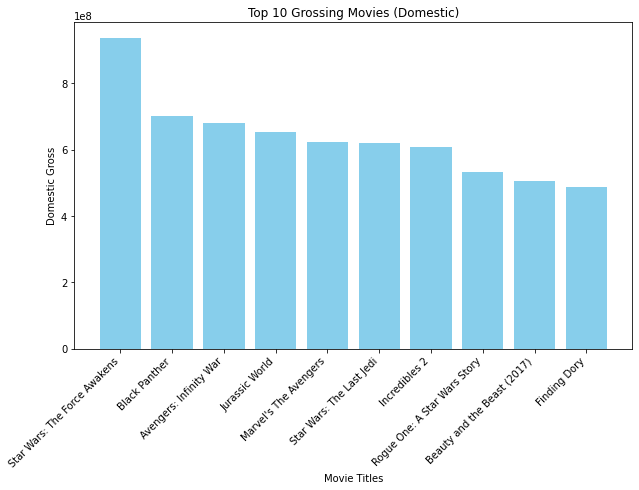

In [65]:
# Sort together by domestic gross 
sorted_df = df.sort_values(by='domestic_gross', ascending=False)  # Sort high to low gross

# Select top 10
top_10_df = sorted_df.head(10)  # Get the first 10 rows (top 10 grossing)

# Create the bar graph
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(top_10_df['title'], top_10_df['domestic_gross'], color='skyblue')  # Plot bars with titles on x-axis
plt.xlabel('Movie Titles')  # Label for x-axis
plt.ylabel('Domestic Gross')  # Label for y-axis
plt.title('Top 10 Grossing Movies (Domestic)')  # Title for the graph

plt.xticks(rotation=45, ha='right')  # Rotate if titles are long
plt.show()


Star Wars: The Force Awakens is the best perfoeming in terms of domestic gross, it is a space opera infused with action-adventure, fantasy, and coming-of-age elements. It explores a central theme of good versus evil, along with themes of family, hope, rebellion, and the consequences of violence.


#### -Let us now visualization foreign gross to see which movie had the highest foreign gross earning

In [66]:
# Sort together by foreign gross 
sorted_foreign_df = df.sort_values(by='foreign_gross', ascending=False)  # Sort high to low gross

# Select top 10
top_10_foreign_df = sorted_foreign_df.head(10)  # Get the first 10 rows (top 10 grossing)
top_10_foreign_df


,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018
1127,Frozen,BV,400700000.0,875700000.0,2013
2764,Wolf Warrior 2,HC,2700000.0,867600000.0,2017
1477,Transformers: Age of Extinction,Par.,245400000.0,858600000.0,2014
1876,Minions,Uni.,336000000.0,823400000.0,2015
3083,Aquaman,WB,335100000.0,812700000.0,2018
1128,Iron Man 3,BV,409000000.0,805800000.0,2013


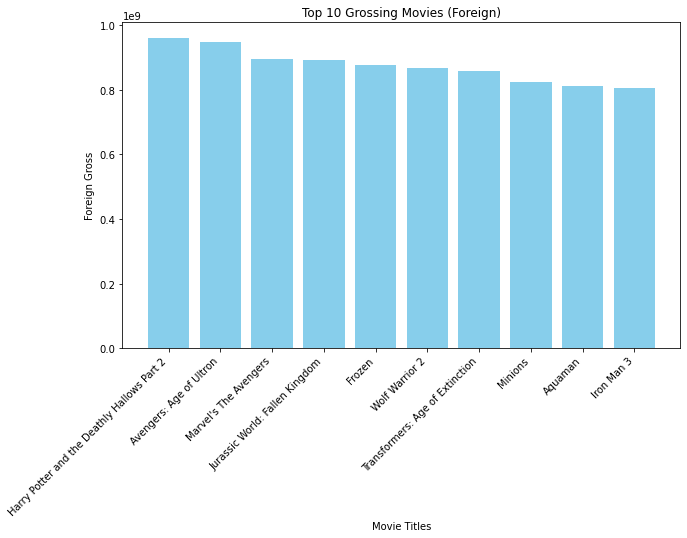

In [67]:
# Create the bar graph
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(top_10_foreign_df['title'], top_10_foreign_df['foreign_gross'], color='skyblue')  # Plot bars with titles on x-axis
plt.xlabel('Movie Titles')  # Label for x-axis
plt.ylabel('Foreign Gross')  # Label for y-axis
plt.title('Top 10 Grossing Movies (Foreign)')  # Title for the graph

plt.xticks(rotation=45, ha='right')  # Rotate if titles are long
plt.show()

Harry Potter and the Deathly Hallows Part 2 is the best performing in terms of foreign gross, while classified as fantasy, Harry Potter and the Deathly Hallows incorporates elements of coming-of-age, dark fantasy, and explores themes that resonate with readers beyond the fantastical setting.

#### -Comparison between foreign_gross and domestic gross



In [68]:
#first let's find the top 10 values that we will compare
# top_10_foreign_df = df.sort_values(by='foreign_gross', ascending=False).head(10)
top_10_foreign_df


,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018
1127,Frozen,BV,400700000.0,875700000.0,2013
2764,Wolf Warrior 2,HC,2700000.0,867600000.0,2017
1477,Transformers: Age of Extinction,Par.,245400000.0,858600000.0,2014
1876,Minions,Uni.,336000000.0,823400000.0,2015
3083,Aquaman,WB,335100000.0,812700000.0,2018
1128,Iron Man 3,BV,409000000.0,805800000.0,2013


In [69]:
#let's see if both columns are workable in terms of arithmetic operations
domestic_type = print(df['domestic_gross'].dtype)
foreign_type = print(df['foreign_gross'].dtype)

print(domestic_type)
print(foreign_type)

float64
float64
None
None


We can use a stacked graph to see the difference in domestic and gross earnings for a sample of the movies

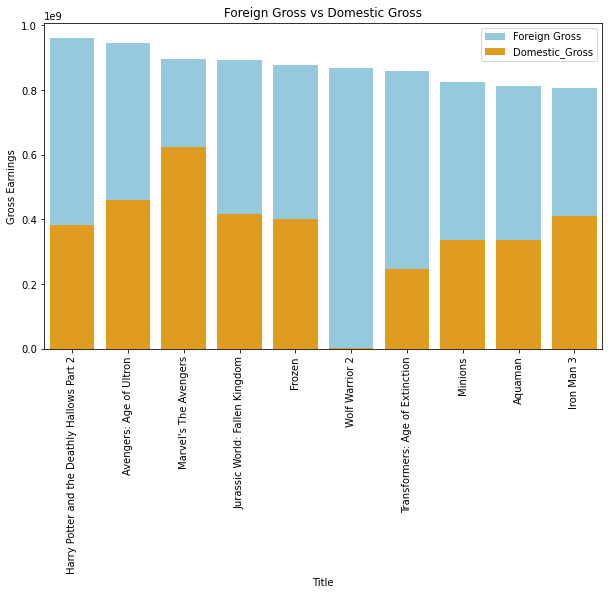

In [71]:
import seaborn as sns

# top_10_joined_tmdb = df.sort_values(by='foreign_gross', ascending=False).head(10)
# Ensure 'foreign_gross' exists in 'df'


plt.figure(figsize=(10,6))

#plot for foreign_gross
sns.barplot(data=top_10_foreign_df, x='title', y='foreign_gross', color='skyblue', label='Foreign Gross')
#plot for domestic_gross
sns.barplot(data=top_10_foreign_df, x='title', y='domestic_gross',color='orange', label='Domestic_Gross')


plt.xlabel('Title')
plt.ylabel('Gross Earnings')
plt.title('Foreign Gross vs Domestic Gross')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
# import seaborn as sns

# top_10_df = df.sort_values(by='foreign_gross', ascending=False).head(10)
# # Ensure 'foreign_gross' exists in 'df'

# plt.figure(figsize=(10,6))

# #plot for foreign_gross
# sns.barplot(data=top_10_df, x='title', y='foreign_gross', color='skyblue', label='Foreign Gross')
# #plot for domestic_gross
# sns.barplot(data=top_10_df, x='title', y='domestic_gross',color='orange', label='Domestic_Gross')


# plt.xlabel('Title')
# plt.ylabel('Gross Earnings')
# plt.title('Foreign Gross vs Domestic Gross')
# plt.legend()
# plt.xticks(rotation=90)
# plt.show()

-From the above bargraph,a higher percentage of the gross earnings for most of these movies come from foreign markets compared to domestic markets.

Let's have another graph to show this relation:

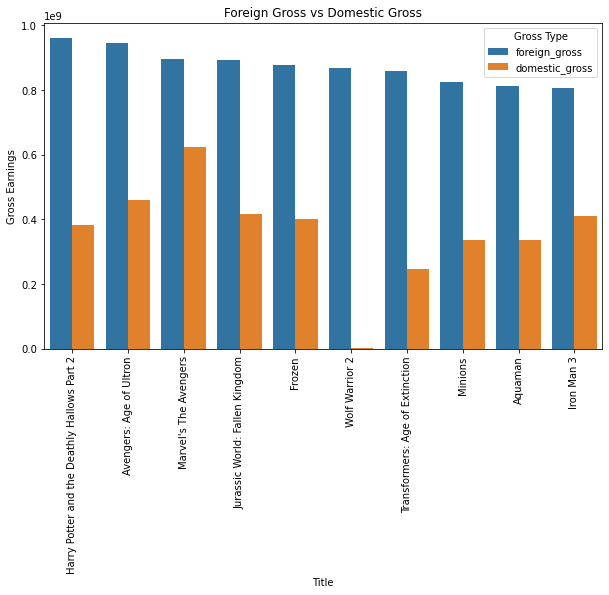

In [73]:
# top_10_foreign_df = df.sort_values(by='foreign_gross', ascending=False).head(10)

melted_top_10_df = top_10_foreign_df.melt(id_vars='title', value_vars=['foreign_gross', 'domestic_gross'], var_name='gross_type', value_name='gross')

#plot figure
plt.figure(figsize=(10,6))

sns.barplot(data=melted_top_10_df, x='title', y='gross', hue='gross_type')

# Customize the plot
plt.xlabel('Title')
plt.ylabel('Gross Earnings')
plt.title('Foreign Gross vs Domestic Gross')
plt.xticks(rotation=90)
plt.legend(title='Gross Type')

# Show the plot
plt.show()

# Exploring another data set

We want to have more comparison for accurate recommendations, we therefore chose another data set under [tmdb.movies.csv](tmdb.movies.csv)

In [74]:
#Reading the data from tmdb.csv
data = pd.read_csv('tmdb.movies.csv')
data.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Let's check which columns in the bom.movie_gross.csv have similar columns with tmdb.csv for merging, in order to be able to analyse the dataframes

In [75]:
df.head(1)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010


In [76]:
data.head(1)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788


Next let us merge the two dataframes on the basis that they have the 'title' column in both 'df' and 'data' Dataframes

In [77]:
# Merge DataFrame

joined_tmdb = data.merge(df,on='title',how='left')

#For any missing values fill with 0
joined_tmdb.fillna(0,inplace=True)



 Change the comment below to a code(ctrl + ?) in order to download the merged csv, I've left it as a comment to avoid multiple downloads of the file each time I Run All

In [28]:
# joined_tmdb.to_csv('Merged_data.csv')

In [78]:

joined_tmdb= pd.read_csv('Merged_data.csv')
joined_tmdb.head()

,Unnamed: 0,Unnamed: 0.1,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,0,0.0,0,0.0
1,1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000,2010.0
2,2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000,2010.0
3,3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,0,0.0,0,0.0
4,4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000,2010.0


Let's now check on popularity of the movies

The mean of the popularity column will be:

In [79]:
joined_tmdb_mean = joined_tmdb['popularity'].mean()
joined_tmdb_max = joined_tmdb['popularity'].max()
joined_tmdb_min = joined_tmdb['popularity'].min()
print(f'joined_tmdb_mean: {joined_tmdb_mean}')
print(f'joined_tmdb_max: {joined_tmdb_max}')
print(f'joined_tmdb_min: {joined_tmdb_min}')

joined_tmdb_mean: 3.130912244974922
joined_tmdb_max: 80.773
joined_tmdb_min: 0.6


The popularity we should aim for is the highest which is at around 80, let's visualize this in order to see which movie did well in terms of popularity

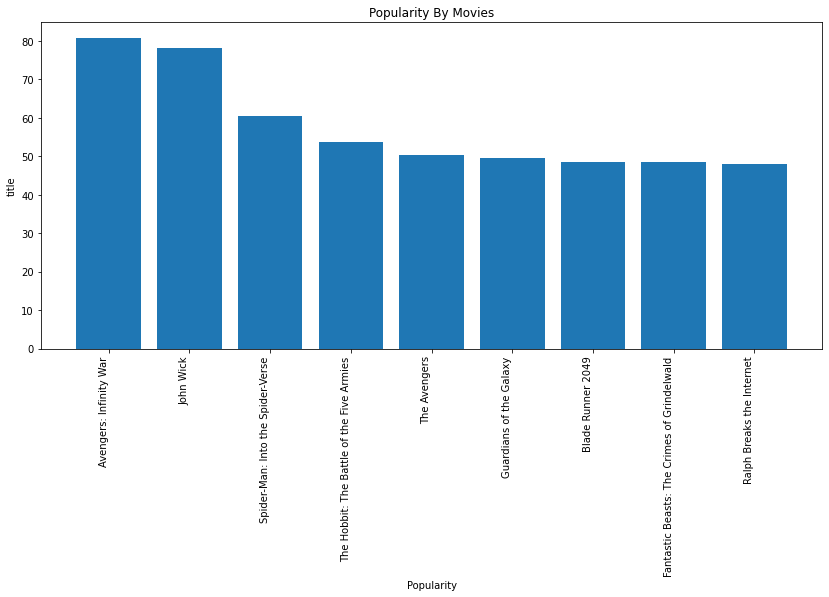

In [80]:
top_10_popular_movies = joined_tmdb.sort_values(by='popularity',ascending=False)[:10]

plt.figure(figsize=(14,6))
plt.bar(data=top_10_popular_movies, x='title', height='popularity')
plt.xlabel('Popularity')
plt.ylabel('title')
plt.xticks(rotation=90, ha='right')
plt.title('Popularity By Movies')
plt.show()





As seen above, Avengers:Infinity War did well in terms of popularity, what can be borrowed from Avengers: Infinity War's success in terms of popularity:Focus on established and popular genres: Superhero films are a proven box-office draw, but other established genres like action, animation, or sci-fi with strong narratives can also be successful.

### Let's now compare popularity of the movie to the foreign gross since we have seen more earnings come from foreign gross

This visualization helps in understanding the relative performance of movies in terms of their foreign gross earnings and popularity, normalized to a common scale for easier comparison.

- Let's check whether an increase in popularity affects the foreign gross using correlation

               foreign_gross  popularity
foreign_gross       1.000000    0.491564
popularity          0.491564    1.000000


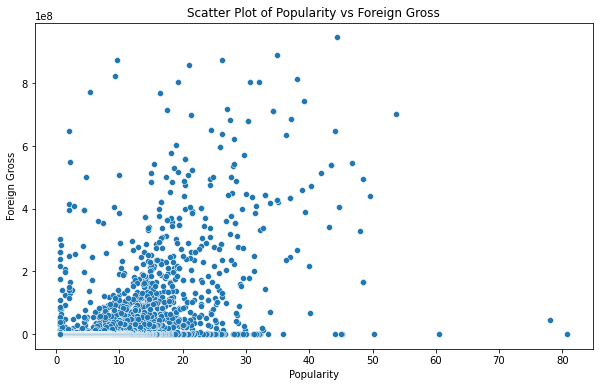

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort and select top 10 rows by 'foreign_gross'
top_10 = joined_tmdb.sort_values(by='foreign_gross', ascending=False).head(10)
top_10

# # Calculate the Pearson correlation coefficient
correlation = joined_tmdb[['foreign_gross', 'popularity']].corr()
print(correlation)

# # Plot a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=joined_tmdb, x='popularity', y='foreign_gross')
plt.xlabel('Popularity')
plt.ylabel('Foreign Gross')
plt.title('Scatter Plot of Popularity vs Foreign Gross')
plt.show()

This shows a weak relationship between foreign gross and popularity: The scatter plot suggests that popularity may not be a strong predictor of foreign gross. Other factors could be more significant in determining foreign gross.

Let us now compare popularity in terms of studio to see which studio has more popular movies, in case any co-productions, which studios should be considered.

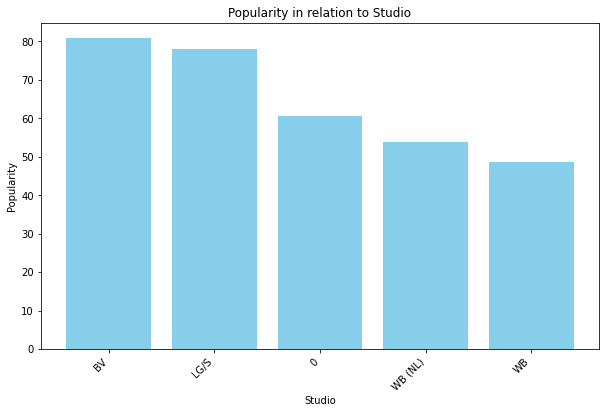

In [101]:
#sort by popularity
top_studio = joined_tmdb.sort_values(by='popularity', ascending=False)  # Sort popularity

# Select top 10
top_studio_10 = top_studio.head(10)  # Get the first 10 rows 
top_studio_10



# Create the bar graph
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(data=top_studio_10, x='studio', height='popularity', color='skyblue')  # Plot bars with titles on x-axis
plt.xlabel('Studio')  # Label for x-axis
plt.ylabel('Popularity')  # Label for y-axis
plt.title('Popularity in relation to Studio')  # Title for the graph

plt.xticks(rotation=45, ha='right')  # Rotate if titles are long
plt.show()

Above, we can see that BV studio is doing well in terms of popularity, therefore can be the first consideration in case of any co-productions

Another comparison on popularity can be in terms of the season when is it best to release the movie. Let us compare release dates to popularity

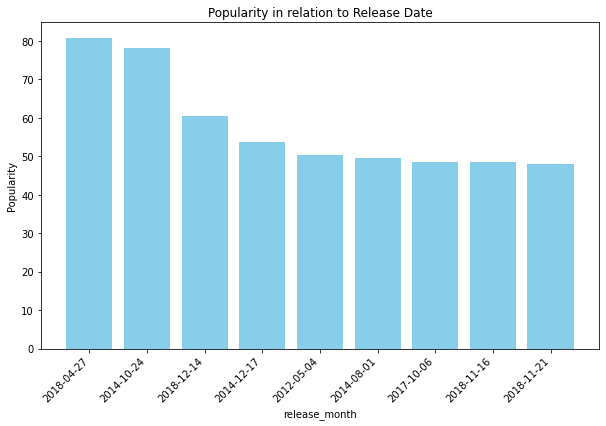

In [115]:
#  top_10_df = sorted_df.head(10)  # Get the first 10 rows (top 10 grossing)
joined_tmdb.dropna(subset=['release_date'], inplace=True)
release_month = pd.to_datetime(joined_tmdb.release_date).dt.to_period('M').dt.to_timestamp()
#sort by popularity
month_by_popularity = joined_tmdb.sort_values(by='popularity', ascending=False)  # Sort popularity

# Select top 10
month_by_popularity_10 = month_by_popularity.head(10)  # Get the first 10 rows 

# Create the bar graph
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(data=month_by_popularity_10, x='release_date', height='popularity', color='skyblue')  # Plot bars with titles on x-axis
plt.xlabel('release_month')  # Label for x-axis
plt.ylabel('Popularity')  # Label for y-axis
plt.title('Popularity in relation to Release Date')  # Title for the graph

plt.xticks(rotation=45, ha='right')  # Rotate if titles are long
plt.show()

The highest popularity values are concentrated in specific periods, such as late April 2018 and late October 2014.
The pattern might suggest that movies released during certain times of the year (e.g., spring or fall) could have higher popularity, potentially due to factors like holidays, school vacations, or award season considerations.

# Exploring another data set

We want to have more comparison, we therefore chose another data set under [tn.movie_budgets.csv](tn.movie_budgets.csv)

In [116]:
#Reading the csv file
df_budget = pd.read_csv('tn.movie_budgets.csv')
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Next thing is to compare the production budget and the worldwide gross to know whether there is any return on investment.

To calculate the Return on Investment (ROI) for movies, you can use the following formula:

ROI = (Worldwide Gross − Production Budget)/Production Budget

​


In [117]:
# Convert columns to numeric after removing commas
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].astype(str).str.replace('[$,]', '', regex=True).astype(float)
df_budget['production_budget'] = df_budget['production_budget'].astype(str).str.replace('[$,]', '', regex=True).astype(float)
df_budget['worldwide_gross'] = pd.to_numeric(df_budget['worldwide_gross'])
df_budget['production_budget'] = pd.to_numeric(df_budget['production_budget'])
df_budget['ROI'] = (df_budget['worldwide_gross'] - df_budget['production_budget']) / df_budget['production_budget']
df_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,3.153696
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,"$936,662,225",2.053311e+09,5.710167
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,5.827114
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,"$309,420,425",9.634204e+08,2.211401
8,9,"Nov 17, 2017",Justice League,300000000.0,"$229,024,295",6.559452e+08,1.186484
9,10,"Nov 6, 2015",Spectre,300000000.0,"$200,074,175",8.796209e+08,1.932070


- Positive ROI: Movies with positive ROI values (e.g., Avatar, Pirates of the Caribbean...) generated more revenue than their production costs. The higher the ROI, the greater the return on investment.
- Negative ROI: Movies with negative ROI values (e.g., Dark Phoenix) had production costs exceeding their worldwide gross, resulting in a financial loss. The more negative the ROI, the larger the financial loss relative to the investment.

Let's do a visualization of the ROI against production budget to see for instance, high-budget movies might have a higher risk of financial loss even with a positive ROI due to a larger initial investment.

In [118]:
#Check for any missing data
print(df_budget['ROI'].isnull().sum())

0


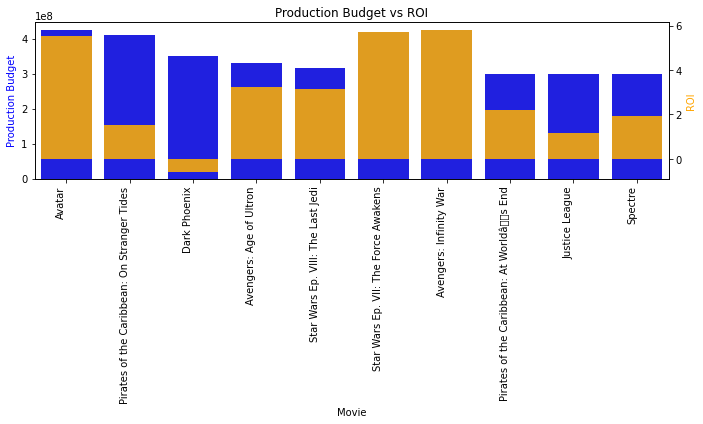

In [119]:

import warnings

warnings.filterwarnings("ignore", message=".*Glyph .* missing from current font.*")

top_10_df_budget = df_budget.sort_values(by='production_budget', ascending=False).head(10)

min_roi = df_budget['ROI'].min()
max_roi = df_budget['ROI'].max()
df_budget['normalized_ROI'] = (df_budget['ROI'] - min_roi) / (max_roi - min_roi)

# # Plot
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(data=top_10_df_budget, x='movie', y='production_budget', ax=ax1, color='blue', label='Production Budget')
ax2 = ax1.twinx()
sns.barplot(data=top_10_df_budget, x='movie', y='ROI', ax=ax2, color='orange', label='ROI')

ax1.set_xlabel('Movie')
ax1.set_ylabel('Production Budget', color='blue')
ax2.set_ylabel('ROI', color='orange')
ax1.set_title('Production Budget vs ROI')
ax1.set_xticklabels(top_10_df_budget['movie'], rotation=90, ha='right')

# Show the plot
fig.tight_layout()
plt.show()


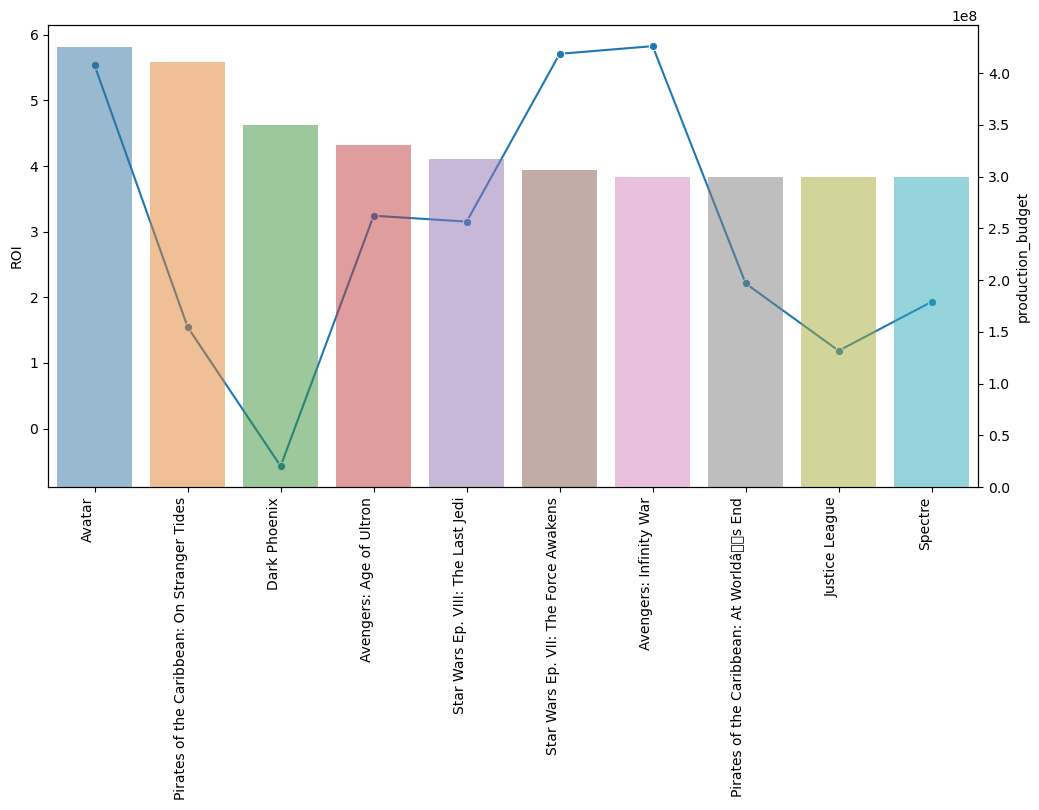

In [125]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc_file_defaults()

top_10_df_budget 
ax1 = sns.set_style(style=None, rc=None )


fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = top_10_df_budget['ROI'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = top_10_df_budget, x='movie', y='production_budget', alpha=0.5, ax=ax2)

ax1.set_xticklabels(top_10_df_budget['movie'], rotation=90, ha='right')
plt.show()

X-axis: The x-axis labels represent the movie titles in the top 10 (based on production budget). The labels are rotated 90 degrees for better readability.

Y-axes: There are two y-axes in this chart:

- Left Y-axis (blue): This axis represents the Production Budget for each movie. The scale is likely in millions or billions of dollars, depending on your data. The blue bars show the production budget for each movie.
- Right Y-axis (yellow): This axis represents the ROI for each movie. Since the ROI values are normalized between 0 and 1, the scale doesn't have specific units but allows for easy comparison between movies on the same scale as the production budget. The yellow bars show the normalized ROI for each movie.

From the graph:
The ROI values (yellow bars) vary across the movies. Some movies with high production budgets also have high normalized ROI (e.g., Avatar), indicating they generated a significant return on investment compared to their production costs. Other movies might have high production budgets but lower ROI (e.g., Dark Phoenix), suggesting they may not have recouped their costs as effectively.

# Recommendations and actionable insights

From the above calculations and visualization, the following conclusions can be drawn

- The earnings made from foreign gross are higher than what is made on domestic gross, which means more investment can be made towards (since the foreign gross is 45 Million and the domestic gross is 28.7M)
- The movie that had the highest domestic gross earning was Star Wars: The Force Awakens is the best perfoeming in terms of domestic gross, it is a space opera infused with action-adventure, fantasy, and coming-of-age elements. It explores a central theme of good versus evil, along with themes of family, hope, rebellion, and the consequences of violence.
- The movie that had the highest domestic gross earning was Harry Potter and the Deathly Hallows Part 2 is the best performing in terms of foreign gross, while classified as fantasy, Harry Potter and the Deathly Hallows incorporates elements of coming-of-age, dark fantasy, and explores themes that resonate with readers beyond the fantastical setting.
- Comparison between foreign_gross and domestic gross shows a higher percentage of the gross earnings for most of these movies come from foreign markets compared to domestic markets.
- The popularity of movies we should aim for is the highest which is at around 80, Avengers:Infinity War did well in terms of popularity, what can be borrowed from Avengers: Infinity War's success in terms of popularity:Focus on established and popular genres: Superhero films are a proven box-office draw, but other established genres like action, animation, or sci-fi with strong narratives can also be successful.
- Checking on whether popularity is affected by foreign gross, shows a weak relationship between foreign gross and popularity: The scatter plot suggests that popularity may not be a strong predictor of foreign gross. Other factors could be more significant in determining foreign gross.
- Comparing popularity in terms of studio to see which studio has more popular movies, in case any co-productions, which studios should be considered, we see that BV studio is doing well in terms of popularity, therefore can be the first consideration in case of any co-productions
- Another comparison on popularity can be in terms of the season when is it best to release the movie. The highest popularity values are concentrated in specific periods, such as late April 2018 and late October 2014.
The pattern might suggest that movies released during certain times of the year (e.g., spring or fall) could have higher popularity, potentially due to factors like holidays, school vacations, or award season considerations.
- Comparing the production budget and the worldwide gross to know whether there is any return on investment, to calculate the Return on Investment (ROI) for movies,The ROI values vary across the movies. Some movies with high production budgets also have high normalized ROI (e.g., Avatar), indicating they generated a significant return on investment compared to their production costs. Other movies might have high production budgets but lower ROI (e.g., Dark Phoenix), suggesting they may not have recouped their costs as effectively.



Recommendations to Microsoft:

- Focus on established and popular genres: Superhero films are a proven box-office draw, but other established genres like action, animation, or sci-fi with strong narratives can also be successful.

- Focus release dates based on seasons such as holidays,The highest popularity values are concentrated in specific periods, such as late April 2018 and late October 2014.The pattern might suggest that movies released during certain times of the year (e.g., spring or fall) could have higher popularity, potentially due to factors like holidays, school vacations, or award season considerations.

- Increased production budget may mean an increase in the earnings but not for all movies.The ROI values vary across the movies. Some movies with high production budgets also have high normalized ROI (e.g., Avatar), indicating they generated a significant return on investment compared to their production costs while others did not return the profits, therefore production budget is not directly proportional to gross earnings for all movies.

